## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 

You can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```


In [ ]:
!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
!unzip dino-dragon.zip

In [1]:
!ls 


dino-dragon.zip  dino-dragon.zip.1  HW8-Deep_learning_CNN.ipynb  test  train


### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 

### Environment:

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2022-11-23 15:22:57.581932: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


In [36]:
# Model architecture:

# def make_model(input_size=150, learning_rate=0.01, size_inner=100,
#                droprate=0.5):
def make_model(input_size = 150, learning_rate=0.002):

    inputs = keras.Input(shape=(input_size, input_size, 3))
    conv2D = tf.keras.layers.Conv2D(32, 3, activation='relu')(inputs)
    maxPooling = keras.layers.MaxPooling2D((2,2))(conv2D)
    vectors = keras.layers.Flatten()(maxPooling)
    inner = keras.layers.Dense(64, activation='relu')(vectors)
    # drop = keras.layers.Dropout(droprate)(inner)    
    outputs = keras.layers.Dense(1, activation = 'sigmoid')(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)
    # loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

Answer: **binary crossentropy**

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873


In [12]:
model = make_model(150,0.002)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                           

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

Check the `class_mode` parameter. Which value should it be for a binary classification problem?

Answer: **It should be 'binary' to produce 1D labels instead of 2D labels.** 

In [8]:
from tensorflow.keras.preprocessing.image import load_img

2022-11-23 12:16:07.509326: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


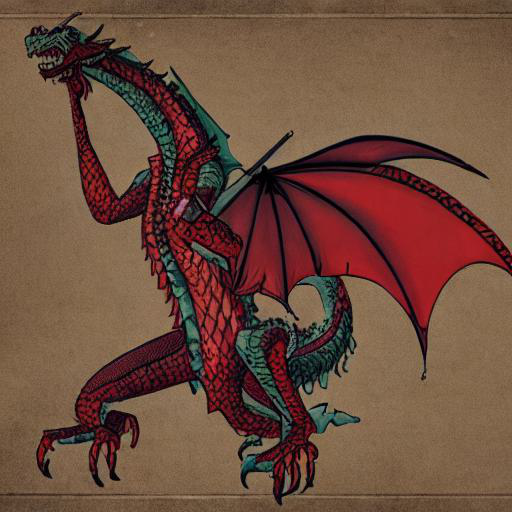

In [9]:
path = './test/dragon/'
name = '99155bd0-ef4d-4f51-be07-ec683945e480.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
input_size = 150

In [30]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle = True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [31]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [32]:
X,y = next(train_ds)
X[0]

array([[[0.26666668, 0.45882356, 0.86274517],
        [0.27450982, 0.4666667 , 0.8705883 ],
        [0.27450982, 0.4666667 , 0.8705883 ],
        ...,
        [0.86274517, 0.78823537, 0.72156864],
        [0.7803922 , 0.7058824 , 0.6392157 ],
        [0.8078432 , 0.73333335, 0.6666667 ]],

       [[0.26666668, 0.45882356, 0.86274517],
        [0.27450982, 0.4666667 , 0.8705883 ],
        [0.27450982, 0.4666667 , 0.8705883 ],
        ...,
        [0.7568628 , 0.68235296, 0.6156863 ],
        [0.7843138 , 0.70980394, 0.6431373 ],
        [0.6901961 , 0.6156863 , 0.54901963]],

       [[0.27058825, 0.46274513, 0.86666673],
        [0.27058825, 0.46274513, 0.86666673],
        [0.27450982, 0.4666667 , 0.8705883 ],
        ...,
        [0.7372549 , 0.6627451 , 0.59607846],
        [0.77647066, 0.7019608 , 0.63529414],
        [0.8588236 , 0.7843138 , 0.7176471 ]],

       ...,

       [[0.10980393, 0.25882354, 0.01960784],
        [0.20000002, 0.3372549 , 0.10980393],
        [0.29411766, 0

In [33]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './test',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [34]:
learning_rate = 0.002

In [35]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'DorD_classification_v1_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)



model = make_model(
    input_size=input_size,
    learning_rate=learning_rate
)


history = model.fit(train_ds, epochs=10, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


80/80 [==============================] - 9s 109ms/step - loss: 0.6297 - accuracy: 0.6374 - val_loss: 0.5304 - val_accuracy: 0.7335
Epoch 2/10
80/80 [==============================] - 9s 107ms/step - loss: 0.4562 - accuracy: 0.8143 - val_loss: 0.4192 - val_accuracy: 0.8122
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3759 - accuracy: 0.8538 - val_loss: 0.3445 - val_accuracy: 0.8604
Epoch 4/10
80/80 [==============================] - 8s 104ms/step - loss: 0.3326 - accuracy: 0.8733 - val_loss: 0.3842 - val_accuracy: 0.8299
Epoch 5/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2919 - accuracy: 0.8877 - val_loss: 0.2996 - val_accuracy: 0.8756
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2641 - accuracy: 0.8940 - val_loss: 0.3007 - val_accuracy: 0.8807
Epoch 7/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2479 - accuracy: 0.9141 - val_loss: 0.3224 - val_accuracy: 0.8629
Epoch 8/10
80/80 

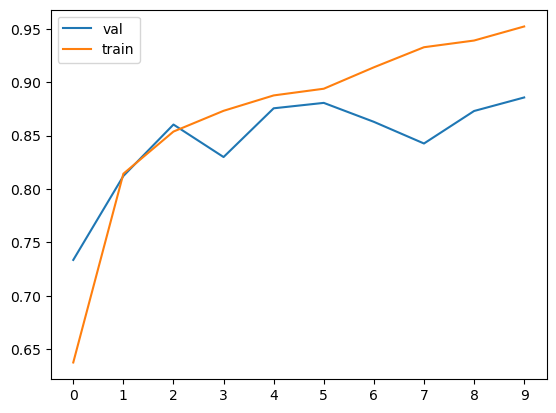

In [42]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()

In [47]:
history.history

{'loss': [0.6296697854995728,
  0.4562062919139862,
  0.3759392201900482,
  0.3325707018375397,
  0.29188045859336853,
  0.26411229372024536,
  0.2478676736354828,
  0.196406751871109,
  0.1722511500120163,
  0.15680493414402008],
 'accuracy': [0.6373901963233948,
  0.8143036365509033,
  0.8538268804550171,
  0.8732748031616211,
  0.8877038955688477,
  0.8939774036407471,
  0.9140527248382568,
  0.9328732490539551,
  0.9391468167304993,
  0.9523212313652039],
 'val_loss': [0.5303546786308289,
  0.4191925823688507,
  0.3445102274417877,
  0.384202241897583,
  0.2996331453323364,
  0.3007444441318512,
  0.32243722677230835,
  0.32786884903907776,
  0.2970203459262848,
  0.26666975021362305],
 'val_accuracy': [0.7335025668144226,
  0.8121827244758606,
  0.8604061007499695,
  0.8299492597579956,
  0.875634491443634,
  0.8807106614112854,
  0.8629441857337952,
  0.8426395654678345,
  0.8730964660644531,
  0.8857868313789368]}

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20



In [40]:
np.median(history.history['accuracy'])

0.8908406496047974

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33




In [44]:
np.std(history.history['loss'])

0.1378432374959207

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`



In [38]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [17]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [18]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 19s 200ms/step - loss: 1.0738 - accuracy: 0.6346 - val_loss: 0.6670 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 16s 162ms/step - loss: 0.6210 - accuracy: 0.7846 - val_loss: 0.5732 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 16s 162ms/step - loss: 0.4573 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 15s 161ms/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.5376 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2951 - accuracy: 0.9042 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.6016 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] 

KeyboardInterrupt: 

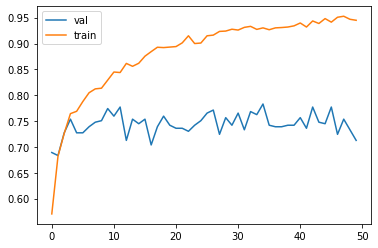

In [12]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97



### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24





## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [3]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
83689472/83683744 [==============================] - 1s 0us/step
[2021-11-03 13:35:43.005 ip-172-16-64-149:21634 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 13:35:43.104 ip-172-16-64-149:21634 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 42s 438ms/step - loss: 1.1849 - accuracy: 0.6033 - val_loss: 0.8076 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 16s 169ms/step - loss: 0.7314 - accuracy: 0.7474 - val_loss: 0.7305 - val_accuracy: 0.7507
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5834 - accuracy: 0.8018 - val_loss: 0.6308 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4878 - accuracy: 0.8370 - val_loss: 0.6715 - val_accuracy: 

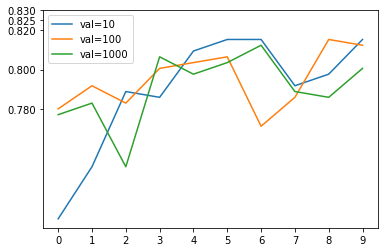

In [16]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

In [13]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
[2021-11-03 21:19:20.707 ip-172-16-13-140:18999 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 21:19:20.814 ip-172-16-13-140:18999 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/30
96/96 [==============================] - 56s 583ms/step - loss: 0.9642 - accuracy: 0.6747 - val_loss: 0.6832 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 15s 158ms/step - loss: 0.5163 - accuracy: 0.8230 - val_loss: 0.6058 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 15s 160ms/step - loss: 0.3458 - accuracy: 0.8885 - val_loss: 0.5577 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 15s 161ms/step - loss: 0.2575 - accuracy: 0.9218 - val_loss: 0.5166 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 15s 1

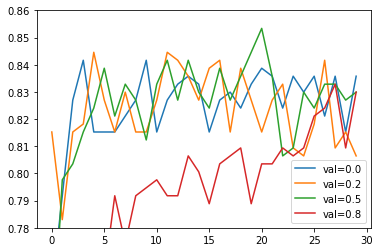

In [16]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

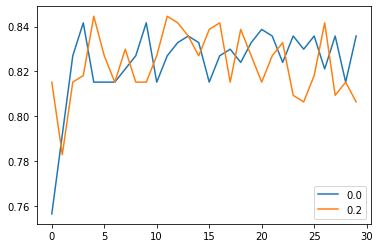

In [23]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [3]:
import tensorflow as tf
from tensorflow import keras

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [7]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [11]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [10]:
model.evaluate(test_ds)

  ...
    to  
  ['...']
12/12 [==============================] - 8s 645ms/step - loss: 0.2939 - accuracy: 0.8978


[0.29389633300403756, 0.89784944]

In [12]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [15]:
img = load_img(path, target_size=(299, 299))

In [16]:
import numpy as np

In [18]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [21]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

In [25]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [26]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}